<a href="https://colab.research.google.com/github/pierreBeuselinck/Less-En-hackathon-ECV-2022/blob/main/projet_python_pokemon_pierre_chaimaa_version_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [275]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, average_precision_score

import seaborn as sns
import matplotlib.pyplot as plt

In [276]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [277]:
df = pd.read_csv('/content/drive/MyDrive/Pokémon/pokemons.csv')
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

types_df = pd.read_csv('/content/drive/MyDrive/Pokémon/pokemon-types.csv')
types_df = types_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

#Pokemons.csv

In [278]:
df

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,a strange seed was planted on its back at birt...
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405,10,130,overgrow chlorophyll,"when the bulb on its back grows large, it appe..."
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525,20,1000,overgrow chlorophyll,the plant blooms when it is absorbing solar en...
3,4,charmander,ordinary,generation-i,nothing,fire,none,39,52,43,60,50,65,309,6,85,blaze solar-power,"obviously prefers hot places. when it rains, s..."
4,5,charmeleon,ordinary,generation-i,charmander,fire,none,58,64,58,80,65,80,405,11,190,blaze solar-power,"when it swings its burning tail, it elevates t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,1013,sinistcha,ordinary,generation-ix,poltchageist,grass,ghost,71,60,106,121,80,70,508,2,22,hospitality heatproof,not available
1013,1014,okidogi,legendary,generation-ix,nothing,poison,fighting,88,128,115,58,86,80,555,18,922,toxic-chain zero-to-hero,not available
1014,1015,munkidori,legendary,generation-ix,nothing,poison,psychic,88,75,66,130,90,106,555,10,122,toxic-chain frisk,not available
1015,1016,fezandipiti,legendary,generation-ix,nothing,poison,fairy,88,91,82,70,125,99,555,14,301,toxic-chain technician,not available


#pokemon-types.csv

In [279]:
types_df

,types,normal,fire,water,electric,grass,ice,fighting,poison,ground,flying,psychic,bug,rock,ghost,dragon,dark,steel,fairy
0,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.0,NaN,NaN,0.5,NaN
1,fire,NaN,0.5,0.5,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,0.5,NaN,0.5,NaN,2.0,NaN
2,water,NaN,2.0,0.5,NaN,0.5,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,0.5,NaN,NaN,NaN
3,electric,NaN,NaN,2.0,0.5,0.5,NaN,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
4,grass,NaN,0.5,2.0,NaN,0.5,NaN,NaN,0.5,2.0,0.5,NaN,0.5,2.0,NaN,0.5,NaN,0.5,NaN
5,ice,NaN,0.5,0.5,NaN,2.0,0.5,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,0.5,NaN
6,fighting,2.0,NaN,NaN,NaN,NaN,2.0,NaN,0.5,NaN,0.5,0.5,0.5,2.0,0.0,NaN,2.0,2.0,0.5
7,poison,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.5,0.5,NaN,NaN,NaN,0.5,0.5,NaN,NaN,0.0,2.0
8,ground,NaN,2.0,NaN,2.0,0.5,NaN,NaN,2.0,NaN,0.0,NaN,0.5,2.0,NaN,NaN,NaN,2.0,NaN
9,flying,NaN,NaN,NaN,0.5,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,0.5,NaN,NaN,NaN,0.5,NaN


In [280]:
df.describe()

,id,hp,atk,def,spatk,spdef,speed,total,height,weight
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,509.000000,69.965585,77.425762,72.215339,69.855457,70.054081,67.060964,426.577188,12.053097,659.910521
std,293.726914,26.598461,29.828754,29.131082,29.557427,26.662701,28.724702,112.432492,12.435152,1198.306370
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,1.000000,1.000000
25%,255.000000,50.000000,55.000000,50.000000,46.000000,50.000000,45.000000,323.000000,5.000000,85.000000
50%,509.000000,67.000000,75.000000,70.000000,65.000000,66.000000,65.000000,450.000000,10.000000,280.000000
75%,763.000000,84.000000,100.000000,90.000000,90.000000,85.000000,88.000000,505.000000,15.000000,682.000000
max,1017.000000,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,720.000000,200.000000,9999.000000


# Qualité de la donnée : Pokemons.csv

In [281]:
# Afficher les premières lignes du DataFrame
df.head()

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,a strange seed was planted on its back at birt...
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405,10,130,overgrow chlorophyll,"when the bulb on its back grows large, it appe..."
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525,20,1000,overgrow chlorophyll,the plant blooms when it is absorbing solar en...
3,4,charmander,ordinary,generation-i,nothing,fire,none,39,52,43,60,50,65,309,6,85,blaze solar-power,"obviously prefers hot places. when it rains, s..."
4,5,charmeleon,ordinary,generation-i,charmander,fire,none,58,64,58,80,65,80,405,11,190,blaze solar-power,"when it swings its burning tail, it elevates t..."


In [282]:
# Vérifier les types de données
df.dtypes

id               int64
name            object
rank            object
generation      object
evolves_from    object
type1           object
type2           object
hp               int64
atk              int64
def              int64
spatk            int64
spdef            int64
speed            int64
total            int64
height           int64
weight           int64
abilities       object
desc            object
dtype: object

In [283]:
# Compter les valeurs manquantes par colonne
df.isnull().sum()

id              0
name            0
rank            0
generation      0
evolves_from    0
type1           0
type2           0
hp              0
atk             0
def             0
spatk           0
spdef           0
speed           0
total           0
height          0
weight          0
abilities       0
desc            0
dtype: int64

In [284]:
# Vérifier s'il y a des doublons
df.duplicated().sum()

0

In [285]:
df.describe()

,id,hp,atk,def,spatk,spdef,speed,total,height,weight
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,509.000000,69.965585,77.425762,72.215339,69.855457,70.054081,67.060964,426.577188,12.053097,659.910521
std,293.726914,26.598461,29.828754,29.131082,29.557427,26.662701,28.724702,112.432492,12.435152,1198.306370
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,1.000000,1.000000
25%,255.000000,50.000000,55.000000,50.000000,46.000000,50.000000,45.000000,323.000000,5.000000,85.000000
50%,509.000000,67.000000,75.000000,70.000000,65.000000,66.000000,65.000000,450.000000,10.000000,280.000000
75%,763.000000,84.000000,100.000000,90.000000,90.000000,85.000000,88.000000,505.000000,15.000000,682.000000
max,1017.000000,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,720.000000,200.000000,9999.000000


# Qualité de la donnée : types.csv

In [286]:
# Afficher les premières lignes du DataFrame
types_df.head()

,types,normal,fire,water,electric,grass,ice,fighting,poison,ground,flying,psychic,bug,rock,ghost,dragon,dark,steel,fairy
0,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.0,NaN,NaN,0.5,NaN
1,fire,NaN,0.5,0.5,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,0.5,NaN,0.5,NaN,2.0,NaN
2,water,NaN,2.0,0.5,NaN,0.5,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,0.5,NaN,NaN,NaN
3,electric,NaN,NaN,2.0,0.5,0.5,NaN,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
4,grass,NaN,0.5,2.0,NaN,0.5,NaN,NaN,0.5,2.0,0.5,NaN,0.5,2.0,NaN,0.5,NaN,0.5,NaN


In [287]:
# Vérifier les types de données
types_df.dtypes

types        object
normal      float64
fire        float64
water       float64
electric    float64
grass       float64
ice         float64
fighting    float64
poison      float64
ground      float64
flying      float64
psychic     float64
bug         float64
rock        float64
ghost       float64
dragon      float64
dark        float64
steel       float64
fairy       float64
dtype: object

In [288]:
# Compter les valeurs manquantes par colonne
types_df.isnull().sum()

types        0
normal      16
fire         9
water       12
electric    14
grass        9
ice         13
fighting    12
poison      11
ground      12
flying      11
psychic     13
bug         12
rock         9
ghost       12
dragon      11
dark        12
steel        4
fairy       12
dtype: int64

In [289]:
# Vérifier s'il y a des doublons
types_df.duplicated().sum()

0

In [290]:
types_df.describe()

,normal,fire,water,electric,grass,ice,fighting,poison,ground,flying,psychic,bug,rock,ghost,dragon,dark,steel,fairy
count,2.000000,9.000000,6.000000,4.000,9.000000,5.00000,6.000000,7.000000,6.000000,7.000000,5.000000,6.000000,9.000000,6.000000,7.000000,6.000000,14.000000,6.000000
mean,1.000000,0.833333,1.000000,0.875,1.333333,1.70000,1.250000,0.928571,1.166667,1.071429,1.400000,1.250000,1.333333,0.833333,1.142857,1.166667,0.785714,0.916667
std,1.414214,0.661438,0.774597,0.750,0.790569,0.67082,0.821584,0.731925,0.930949,0.886405,0.821584,0.821584,0.790569,0.930949,0.801784,0.930949,0.671230,0.861201
min,0.000000,0.500000,0.500000,0.500,0.500000,0.50000,0.500000,0.500000,0.000000,0.000000,0.500000,0.500000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.500000,0.500000,0.500000,0.500,0.500000,2.00000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.125000,0.500000,0.500000,0.500000,0.500000
50%,1.000000,0.500000,0.500000,0.500,2.000000,2.00000,1.250000,0.500000,1.250000,0.500000,2.000000,1.250000,2.000000,0.500000,0.500000,1.250000,0.500000,0.500000
75%,1.500000,0.500000,1.625000,0.875,2.000000,2.00000,2.000000,1.250000,2.000000,2.000000,2.000000,2.000000,2.000000,1.625000,2.000000,2.000000,0.500000,1.625000
max,2.000000,2.000000,2.000000,2.000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


**Quand l'efficacité des types est neutre, leurs valeurs sont "NaN", nous les avons remplacées par une valeur numérique**

In [291]:
types_df.fillna(1, inplace=True)

In [292]:
types_df

,types,normal,fire,water,electric,grass,ice,fighting,poison,ground,flying,psychic,bug,rock,ghost,dragon,dark,steel,fairy
0,normal,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,1.0
1,fire,1.0,0.5,0.5,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,1.0,2.0,1.0
2,water,1.0,2.0,0.5,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0
3,electric,1.0,1.0,2.0,0.5,0.5,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
4,grass,1.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,0.5,1.0
5,ice,1.0,0.5,0.5,1.0,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0
6,fighting,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,0.5,0.5,0.5,2.0,0.0,1.0,2.0,2.0,0.5
7,poison,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0
8,ground,1.0,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,0.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,1.0
9,flying,1.0,1.0,1.0,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,0.5,1.0


# Explorations

# Nombre total de Pokémon

In [293]:
nombre_total_pokemon = df.shape[0]
print(f"Le nombre total de Pokémon dans le dataset est : {nombre_total_pokemon}")

Le nombre total de Pokémon dans le dataset est : 1017


# Répartition du Nombre de Pokémon par Génération

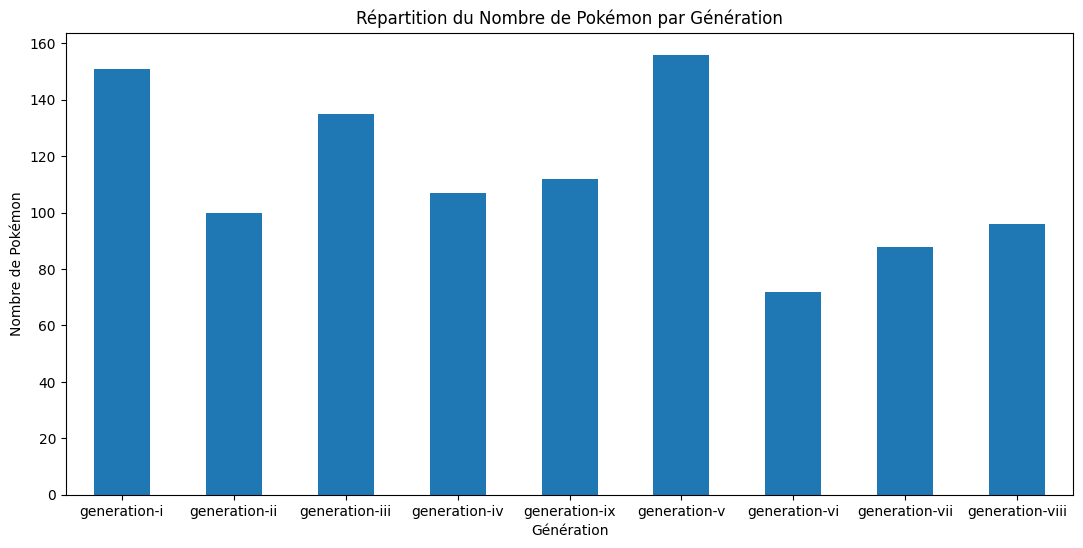

In [294]:
generation_counts = df['generation'].value_counts().sort_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))
generation_counts.plot(kind='bar')
plt.title('Répartition du Nombre de Pokémon par Génération')
plt.xlabel('Génération')
plt.ylabel('Nombre de Pokémon')
plt.xticks(rotation=0)
plt.show()


# Nombre de Pokemons par type

In [295]:
type_counts = df['type1'].value_counts()

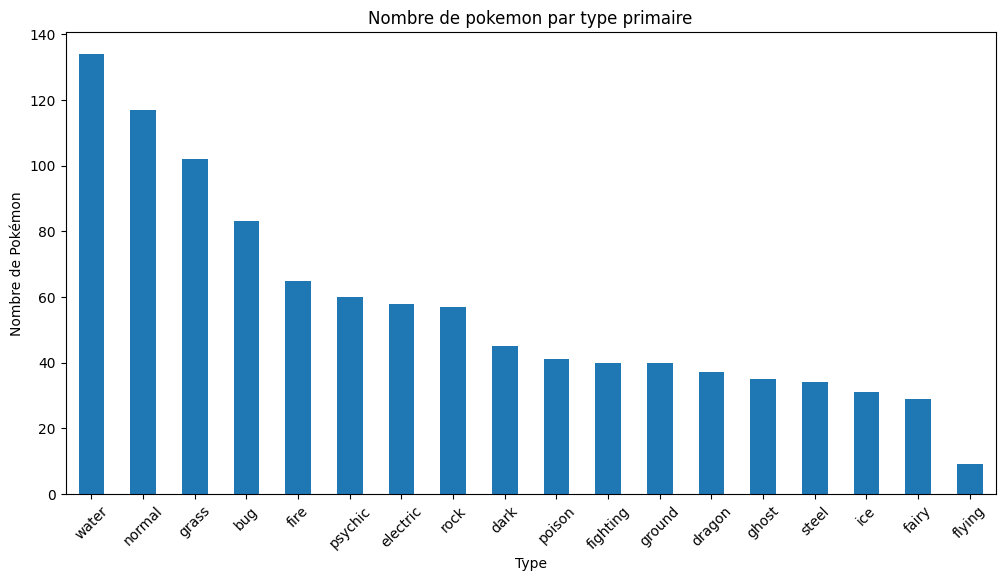

In [296]:
plt.figure(figsize=(12, 6))
type_counts.plot(kind='bar')
plt.title('Nombre de pokemon par type primaire')
plt.xlabel('Type')
plt.ylabel('Nombre de Pokémon')
plt.xticks(rotation=45)
plt.show()

# Moyenne des Statistiques par Type de *Pokémon*

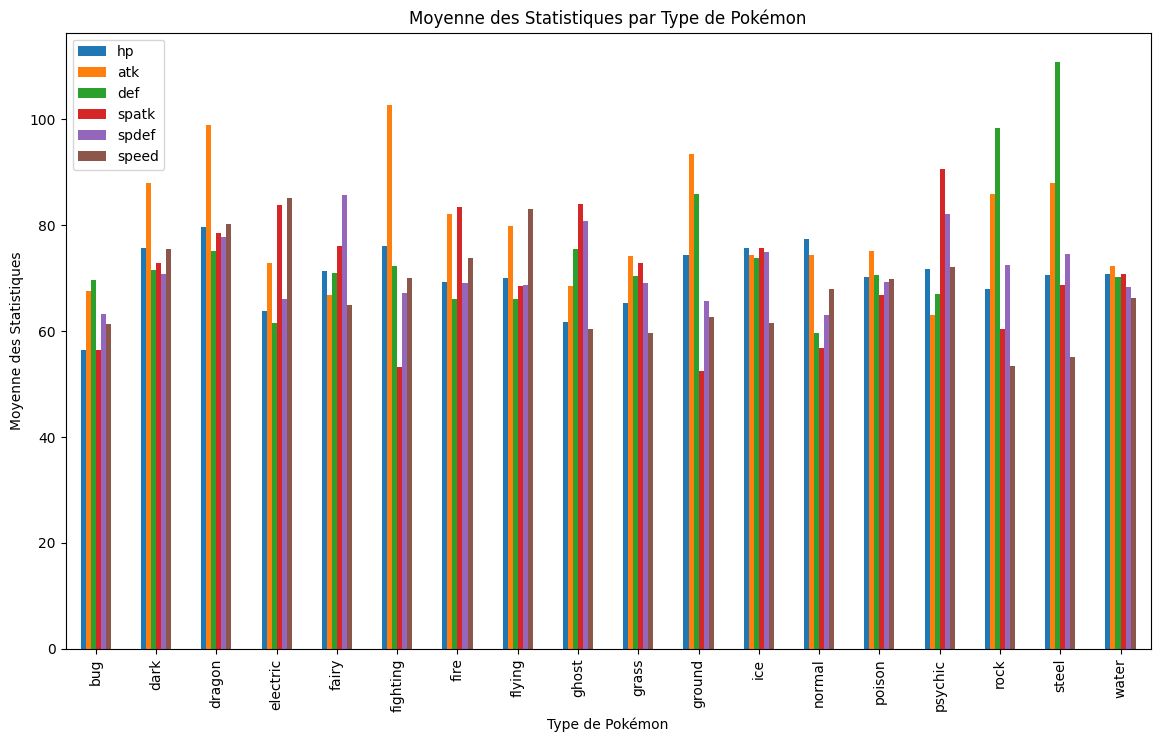

In [297]:
mean_stats_by_type = df.groupby('type1')[['hp', 'atk', 'def', 'spatk', 'spdef', 'speed']].mean()

# Afficher ces moyennes sous forme de graphique à barres
mean_stats_by_type.plot(kind='bar', figsize=(14, 8))
plt.title('Moyenne des Statistiques par Type de Pokémon')
plt.ylabel('Moyenne des Statistiques')
plt.xlabel('Type de Pokémon')
plt.show()

# Comparaison entre Rangs et Statistiques des Pokémon

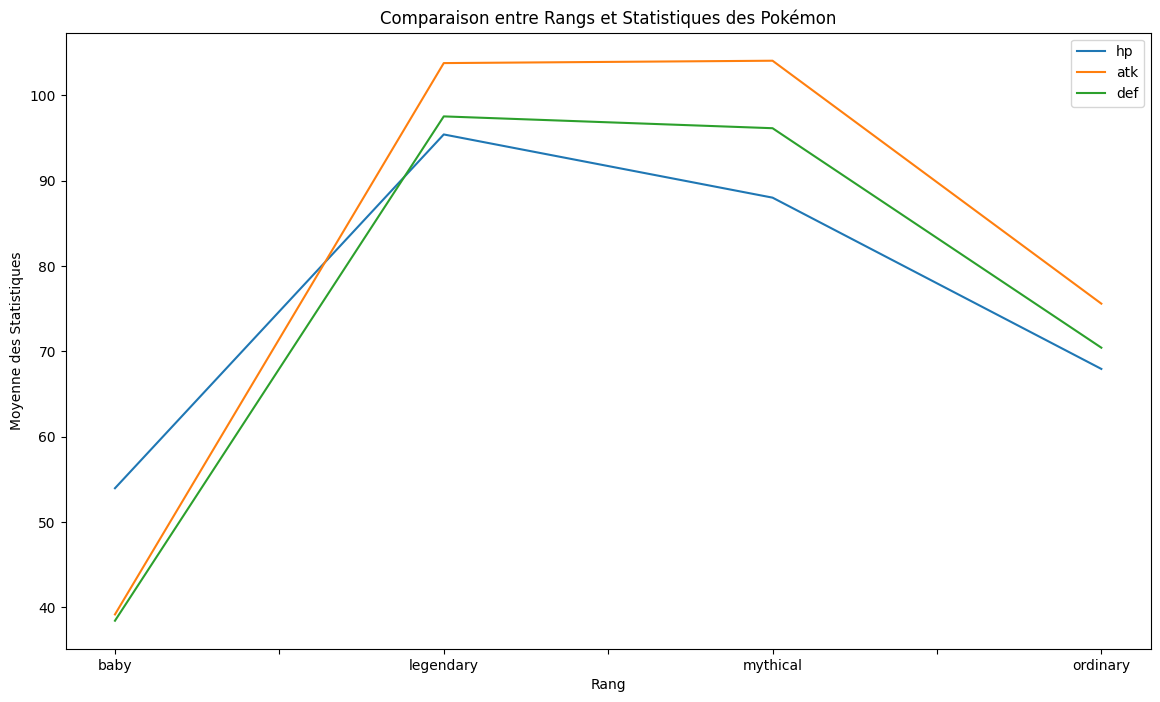

In [298]:
# Exemple de comparaison entre rangs et statistiques
rank_comparison = df.groupby('rank')[['hp', 'atk', 'def']].mean()

# Afficher sous forme de graphique
rank_comparison.plot(kind='line', figsize=(14, 8))
plt.title('Comparaison entre Rangs et Statistiques des Pokémon')
plt.ylabel('Moyenne des Statistiques')
plt.xlabel('Rang')
plt.show()


# Distribution des Aptitudes des Pokémon

In [299]:
unique_abilities_count = df['abilities'].nunique()
unique_abilities_count

617

In [300]:
abilities_count = df['abilities'].value_counts()

abilities_count.plot(kind='bar', figsize=(617, 20))
plt.title('Distribution des Aptitudes des Pokémon')
plt.ylabel('Nombre de Pokémon')
plt.xlabel('Aptitude')
plt.show()


# Relation entre Taille et Poids des Pokémon

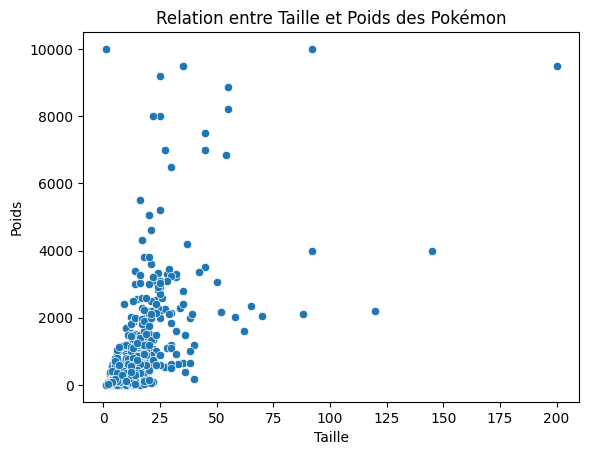

In [301]:
sns.scatterplot(data=df, x='height', y='weight')
plt.title('Relation entre Taille et Poids des Pokémon')
plt.xlabel('Taille')
plt.ylabel('Poids')
plt.show()


# Matrice de l'efficacité des types

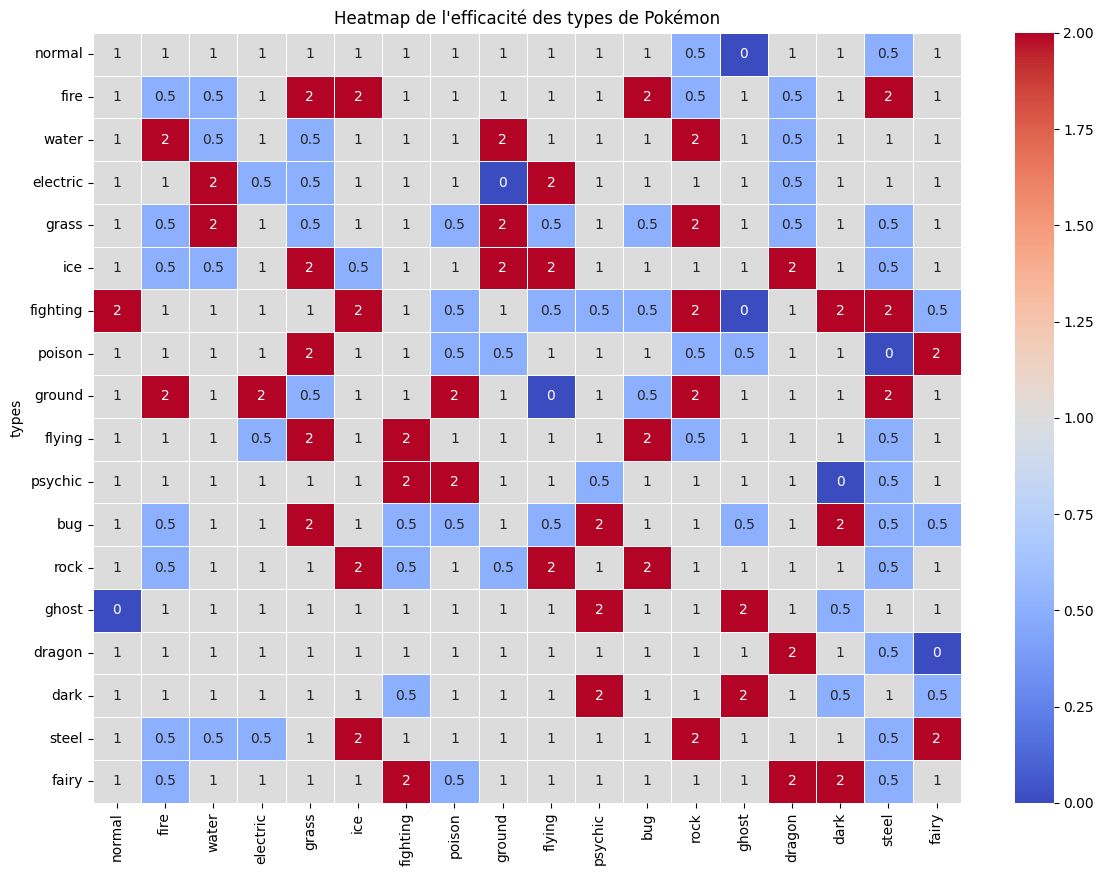

In [302]:
# Remplacement des valeurs NaN par 1 pour indiquer une efficacité neutre
df_types_filled = types_df.fillna(1).set_index('types')

# Création de la heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_types_filled, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap de l\'efficacité des types de Pokémon')
plt.show()


# Efficacité d'un type contre un autre

In [303]:
def comparer_types(type1, type2, types_df):
    type1 = type1.lower()
    type2 = type2.lower()

    efficacite_type1_contre_type2 = types_df.loc[types_df['types'] == type1, type2].values[0]
    efficacite_type2_contre_type1 = types_df.loc[types_df['types'] == type2, type1].values[0]

    # Afficher les efficacités
    print(f"Efficacité de {type1.capitalize()} contre {type2.capitalize()}: {efficacite_type1_contre_type2}")
    print(f"Efficacité de {type2.capitalize()} contre {type1.capitalize()}: {efficacite_type2_contre_type1}")

    # Déterminer lequel est potentiellement plus fort
    if efficacite_type1_contre_type2 > efficacite_type2_contre_type1:
        print(f"{type1.capitalize()} a un avantage théorique sur {type2.capitalize()}")
    elif efficacite_type1_contre_type2 < efficacite_type2_contre_type1:
        print(f"{type2.capitalize()} a un avantage théorique sur {type1.capitalize()}")
    else:
        print(f"{type1.capitalize()} et {type2.capitalize()} sont potentiellement équilibrés")

# Tester la fonction de comparaison des types
comparer_types('Water', 'Electric', types_df)

Efficacité de Water contre Electric: 1.0
Efficacité de Electric contre Water: 2.0
Electric a un avantage théorique sur Water


# Comparatif entre deux pokémon sur leurs types



**Formatage de la donnée avant de faire le comparatif**

In [304]:
type_pikachu = 'electric'
type_bulbasaur = 'grass'

# Vérifier si les types existent dans types_df
print(type_pikachu in types_df['types'].values)  # Doit retourner True
print(type_bulbasaur in types_df['types'].values)  # Doit retourner True


True
True


In [305]:
# Définir la colonne 'types' comme l'index du DataFrame
types_df.set_index('types', inplace=True)

# Remplacer les valeurs NaN par 1, car une valeur NaN signifie généralement une efficacité normale (pas de faiblesse ni de force)
types_df.fillna(1, inplace=True)

# Afficher les premières lignes du DataFrame modifié pour vérification
types_df.head()

,normal,fire,water,electric,grass,ice,fighting,poison,ground,flying,psychic,bug,rock,ghost,dragon,dark,steel,fairy
types,,,,,,,,,,,,,,,,,,
normal,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,1.0
fire,1.0,0.5,0.5,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,1.0,2.0,1.0
water,1.0,2.0,0.5,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0
electric,1.0,1.0,2.0,0.5,0.5,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
grass,1.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,0.5,1.0


**Le comparatif entre les deux pokemons**

In [306]:
def comparer_pokemon_double_type(nom_pokemon1, nom_pokemon2, df, types_df):
    # Obtaining the types for each Pokémon
    types_pokemon1 = df.loc[df['name'].str.lower() == nom_pokemon1.lower(), ['type1', 'type2']].values.flatten()
    types_pokemon1 = [t.lower() for t in types_pokemon1 if pd.notnull(t) and t.lower() != 'none']

    types_pokemon2 = df.loc[df['name'].str.lower() == nom_pokemon2.lower(), ['type1', 'type2']].values.flatten()
    types_pokemon2 = [t.lower() for t in types_pokemon2 if pd.notnull(t) and t.lower() != 'none']

    # Ensuring the types_df DataFrame is in lowercase for consistency
    types_df.columns = types_df.columns.str.lower()
    types_df.index = types_df.index.str.lower()

    # Fill NaN values which might cause multiplication issues
    types_df.fillna(1, inplace=True)

    # Initializing the effectiveness
    efficacite_pokemon1, efficacite_pokemon2 = 1, 1

    # Debugging: Print the types for each Pokémon
    print(f"Types for {nom_pokemon1}: {types_pokemon1}")
    print(f"Types for {nom_pokemon2}: {types_pokemon2}")

    # Calculate the effectiveness of each type of Pokémon 1 against each type of Pokémon 2
    for type1 in types_pokemon1:
        for type2 in types_pokemon2:
            efficacite = types_df.at[type1, type2] if type2 in types_df.columns else 1
            efficacite_pokemon1 *= efficacite
            # Debugging: Print the effectiveness of each type against the other
            print(f"Effectiveness of {type1} against {type2} (Pokémon 1 vs Pokémon 2): {efficacite}")

    # Calculate the effectiveness of each type of Pokémon 2 against each type of Pokémon 1
    for type2 in types_pokemon2:
        for type1 in types_pokemon1:
            efficacite = types_df.at[type2, type1] if type1 in types_df.columns else 1
            efficacite_pokemon2 *= efficacite
            # Debugging: Print the effectiveness of each type against the other
            print(f"Effectiveness of {type2} against {type1} (Pokémon 2 vs Pokémon 1): {efficacite}")

    # Debugging: Print the total effectiveness
    print(f"Total effectiveness for {nom_pokemon1} against {nom_pokemon2}: {efficacite_pokemon1}")
    print(f"Total effectiveness for {nom_pokemon2} against {nom_pokemon1}: {efficacite_pokemon2}")

    # Determining the overall advantage
    if efficacite_pokemon1 > efficacite_pokemon2:
        print(f"{nom_pokemon1.capitalize()} has an advantage over {nom_pokemon2.capitalize()}.")
    elif efficacite_pokemon1 < efficacite_pokemon2:
        print(f"{nom_pokemon2.capitalize()} has an advantage over {nom_pokemon1.capitalize()}.")
    else:
        print(f"{nom_pokemon1.capitalize()} and {nom_pokemon2.capitalize()} are equally matched.")



# Test de la fonction
comparer_pokemon_double_type('swampert', 'raikou', df, types_df)
# comparer_pokemon_double_type('blastoise', 'raikou', df, types_df)
# comparer_pokemon_double_type('dialga', 'tyranitar', df, types_df)


Types for swampert: ['water', 'ground']
Types for raikou: ['electric']
Effectiveness of water against electric (Pokémon 1 vs Pokémon 2): 1.0
Effectiveness of ground against electric (Pokémon 1 vs Pokémon 2): 2.0
Effectiveness of electric against water (Pokémon 2 vs Pokémon 1): 2.0
Effectiveness of electric against ground (Pokémon 2 vs Pokémon 1): 0.0
Total effectiveness for swampert against raikou: 2.0
Total effectiveness for raikou against swampert: 0.0
Swampert has an advantage over Raikou.


#Comparatif de deux pokémon sur la base stats globale

In [307]:
def comparer_pokemons(nom_pokemon1, nom_pokemon2):
    # Convertir les noms de Pokémon en minuscules
    nom_pokemon1 = nom_pokemon1.lower()
    nom_pokemon2 = nom_pokemon2.lower()

    # Sélection des données des deux Pokémon
    pokemon1_data = df[df['name'] == nom_pokemon1]
    pokemon2_data = df[df['name'] == nom_pokemon2]

    if not pokemon1_data.empty and not pokemon2_data.empty:
        # Extraire les caractéristiques pertinentes pour la comparaison
        types_pokemon1 = pokemon1_data.iloc[0]['type1'].lower()
        types_pokemon2 = pokemon2_data.iloc[0]['type1'].lower()
        total_pokemon1 = pokemon1_data.iloc[0]['total']
        total_pokemon2 = pokemon2_data.iloc[0]['total']
        # Ajoutez d'autres caractéristiques que vous souhaitez comparer...

        # Afficher les caractéristiques des deux Pokémon
        print(f"{nom_pokemon1}: Type({types_pokemon1}), Total({total_pokemon1})")
        print(f"{nom_pokemon2}: Type({types_pokemon2}), Total({total_pokemon2})")

        # Comparaison des caractéristiques
        if total_pokemon1 > total_pokemon2:
            print(f"{nom_pokemon1} est potentiellement plus fort que {nom_pokemon2}")
        elif total_pokemon1 < total_pokemon2:
            print(f"{nom_pokemon2} est potentiellement plus fort que {nom_pokemon1}")
        else:
            print(f"{nom_pokemon1} et {nom_pokemon2} sont potentiellement égaux en termes de force")
    else:
        print(f"Données pour {nom_pokemon1} ou {nom_pokemon2} introuvables. Vérifiez les noms des Pokémon.")

# Exemple d'utilisation
comparer_pokemons('mewtwo', 'arceus')




mewtwo: Type(psychic), Total(680)
arceus: Type(normal), Total(720)
arceus est potentiellement plus fort que mewtwo
